In [15]:
import pandas as pd
import AdsAbsRequester
from collections import Counter
import matplotlib.pyplot as plt

In [16]:
token="KDaPKeB4q7noKbg00u3gjlqszxYEWQ94YguJ0OmR"
requester=AdsAbsRequester.Requester(token,'testRequest')

In [38]:
searchCriteria=('year:2000-2020','database:astronomy','property:refereed',
                'title:"photometric redshift"')
addCriteria={'DNN+CNN':'abs:("deep neural network" or "convolutional neural network")',
            'RF+DT':'abs:("random forest" or "decision tree" or "TPZ")',
            'SVM':'abs:("support vector machine")',
            'Gaussian process':'abs:("gaussian process" or "gaussian processes")',
            'SOM':'abs:("self-organizing map")',
            'k-NN':'abs:("k-nearest neighbor")',
            'Shallow NN':'abs:("neural network" or "perceptron" or "neural-network") -abs:("deep neural network" or "convolutional neural network")',
            'Other':'abs:"machine learning" -abs:("neural network" or "perceptron" or "TPZ" or "Mixture" or "Gaussian process" or "Gaussian processes" or "support vector machine" or "self-organizing map" or "decision tree" or "random forest")'}

In [40]:
counts={}
requester.setParams(searchCriteria+('machine learning',))
requester.loadData()
counts['Total']=requester.response.json()['response']['numFound']
for key,val in addCriteria.items():
    print(key)
    req=searchCriteria+(val,)
    requester.setParams(req)
    requester.loadData()
    counts[key]=requester.response.json()['response']['numFound']

DNN+CNN
RF+DT
SVM
Gaussian process
SOM
k-NN
Shallow NN
Other


In [41]:
counts

{'Total': 54,
 'DNN+CNN': 8,
 'RF+DT': 20,
 'SVM': 6,
 'Gaussian process': 10,
 'SOM': 12,
 'k-NN': 9,
 'Shallow NN': 45,
 'Other': 20}

In [ ]:
del counts['Total']

([<matplotlib.patches.Wedge at 0x7fcf0e931f98>,
 [Text(1.079507138715303, 0.21133938928344606, 'DNN+CNN, 8'),
  Text(0.7093264185692548, 0.8407473056273892, 'RF+DT, 20'),
  Text(0.07967823691748083, 1.0971104678024552, 'SVM, 6'),
  Text(-0.3399187476842659, 1.0461621504206509, 'Gaussian process, 10'),
  Text(-0.823361871582463, 0.7294348692132999, 'SOM, 12'),
  Text(-1.0740852064569135, 0.23736252709812816, 'k-NN, 9'),
  Text(-0.5111953699962625, -0.974001690806738, 'Shallow NN, 45'),
  Text(0.9740017147375195, -0.5111953243999517, 'Other, 20')])

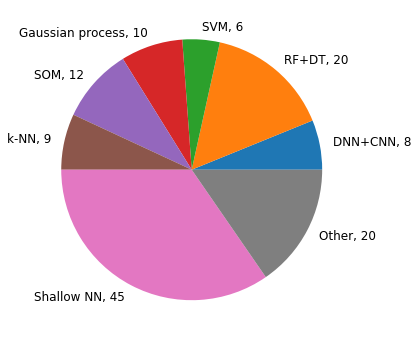

In [70]:
fix,axs=plt.subplots(1,1,figsize=(6,6))
labels=[c+', '+str(v) for c,v in counts.items()]
axs.pie(list(counts.values()),labels=labels,textprops={'fontsize': 12})